# What are TargetPixelFile objects?

### 1 - Getting the time:

Use Kepler in front for the Kepler and K2 missions, and Tess for the Tess mission.

Either TargetPixelFile(exact_link) or search_targetpixelfile(name).

(Here, we'll ignore the warning as the rest of the code seems to be working)

In [1]:
from lightkurve import *
tpf = search_targetpixelfile(6922244, quarter=4).download()

C:\Users\pierr\Anaconda3\lib\site-packages\astropy\table\column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


We can check what is our tpf, and its info:

In [2]:
print(str(tpf) + ', ' + str(tpf.mission) + ', ' + str(tpf.quarter))

KeplerTargetPixelFile Object (ID: 6922244), Kepler, 4


The most import info of the tpf are the flux and the timestamp.

We can get the **time stamp** through:


In [3]:
tpf.time

array([ 352.37632485,  352.39675805,  352.43762445, ...,  442.16263546,
        442.18306983,  442.2035041 ])

Although this timestamp is in the Barycentric Kepler Julian Day format, to get it in our common format we can use:

In [4]:
tpf.astropy_time

<Time object: scale='tdb' format='jd' value=[ 2455185.37632485  2455185.39675805  2455185.43762445 ...,
  2455275.16263546  2455275.18306983  2455275.2035041 ]>

And to get it in a **readable format**:

In [5]:
tpf.astropy_time.iso

array(['2009-12-19 21:01:54.467', '2009-12-19 21:31:19.895',
       '2009-12-19 22:30:10.752', ..., '2010-03-19 15:54:11.704',
       '2010-03-19 16:23:37.233', '2010-03-19 16:53:02.754'], 
      dtype='<U23')

So this tpf was recorded from 2009-12-19 to 2010-03-19.
Though, those time coordinates are in the **solar coordinates**, so if we need to consider **Earth's time**, we can use:

In [6]:
tpf.astropy_time.utc.iso

array(['2009-12-19 21:00:48.283', '2009-12-19 21:30:13.712',
       '2009-12-19 22:29:04.569', ..., '2010-03-19 15:53:05.518',
       '2010-03-19 16:22:31.048', '2010-03-19 16:51:56.568'], 
      dtype='<U23')

### 2 - Plotting the flux:

Now we want to **access the flux**. This command gives us the depth, and dimensions of the image:

In [7]:
tpf.flux.shape

(4116, 5, 5)

To plot the first frame of our tpf, we use:

(It is import to add **%matplotlib inline** to able the program to show the plots. We just need it once)

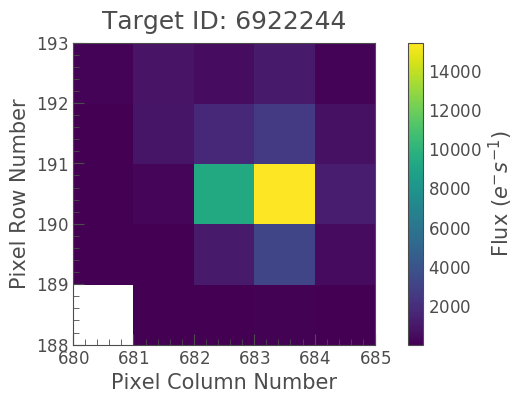

In [8]:
%matplotlib inline
tpf.plot(frame=0)

Those values in this plot are also accessible in form of an array:

In [9]:
tpf.flux[0]

array([[             nan,   5.60793352e+00,   5.14911423e+01,
          8.42417450e+01,   3.02213345e+01],
       [  4.40456200e+01,   7.68612289e+01,   1.12277588e+03,
          3.22620288e+03,   4.54867767e+02],
       [  2.59111652e+01,   2.29075928e+02,   9.36265430e+03,
          2.36062734e+04,   1.20877502e+03],
       [  4.01008301e+01,   8.85439270e+02,   1.71021179e+03,
          2.62548706e+03,   7.07966064e+02],
       [  1.57194168e+02,   8.37134399e+02,   5.10215393e+02,
          1.15010413e+03,   1.83133698e+02]], dtype=float32)

From this array, we can use <font color='blue'>numpy</font> methods to calculate anything in this plot.

For exemple, let's try to calcultate the mean flux of this frame:

In [10]:
import numpy as np
import math

sum1 = 0
count = 0
tpf_flux = tpf.flux[0]

for x in tpf_flux:
    for y in x:
        if math.isnan(y) == False:
            sum1 += y
        count += 1
        
meanValue = sum1/count

print("The mean value of this frame is " + str(meanValue))

The mean value of this frame is 1933.43968737


It is useful to access the **aperture mask** with tpf.pipeline_mask and to plot the flux with the mask on:

In [11]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]], dtype=bool)

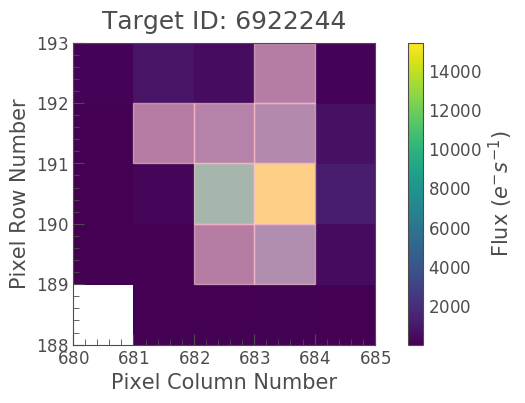

In [12]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

# What are LightCurve objects?

Now, we're going to see how to use the masked area to get a lightcurve.

First, we need to convert our TargetPixelFile into a LightCurve with the aperture mask on:

In [13]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

(Note: We could have used any mask, it just need to be a boolean array)

We can still access the info through the lightcurve:

In [14]:
lc.mission, lc.quarter, lc.flux, lc.time

('Kepler', 4, array([ 43689.1484375 ,  43698.078125  ,  43694.10546875, ...,
         43155.80078125,  43148.46484375,  43151.5625    ], dtype=float32), array([ 352.37632485,  352.39675805,  352.43762445, ...,  442.16263546,
         442.18306983,  442.2035041 ]))

We can also check the “CDPP” noise metric of the lightcurve using the built in method:

In [15]:
lc.estimate_cdpp()

75.298678403226802

We can plot the lightcurve with this method:

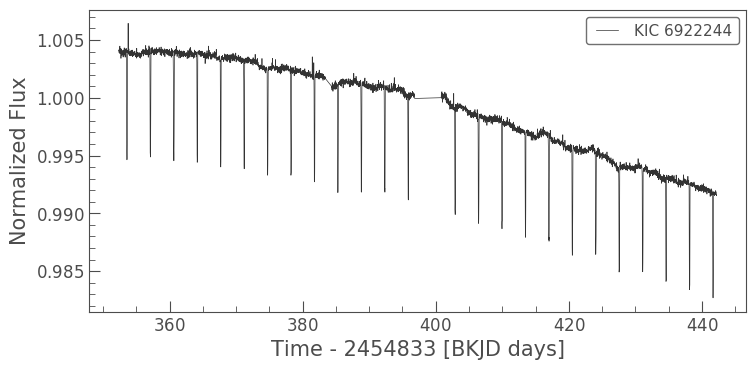

In [16]:
lc.plot()

There are a set of useful functions in LightCurve objects which you can use to work with the data. These include: ** flatten()**: Remove long term trends using a Savitzky–Golay filter ** remove_outliers()**: Remove outliers using simple sigma clipping ** remove_nans()**: Remove infinite or NaN values (these can occur during thruster firings) ** fold()**: Fold the data at a particular period ** bin()**: Reduce the time resolution of the array, taking the average value in each bin.

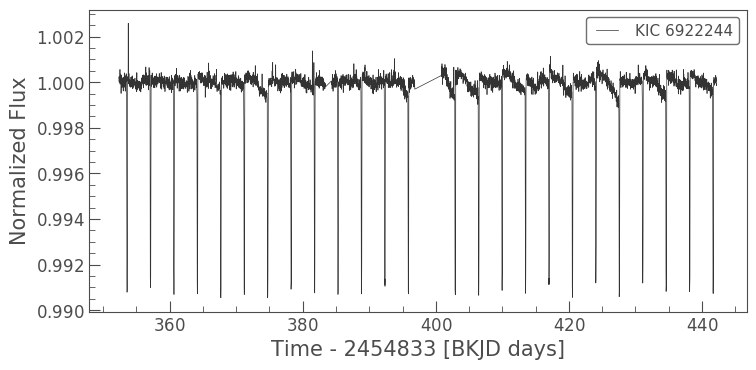

In [17]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

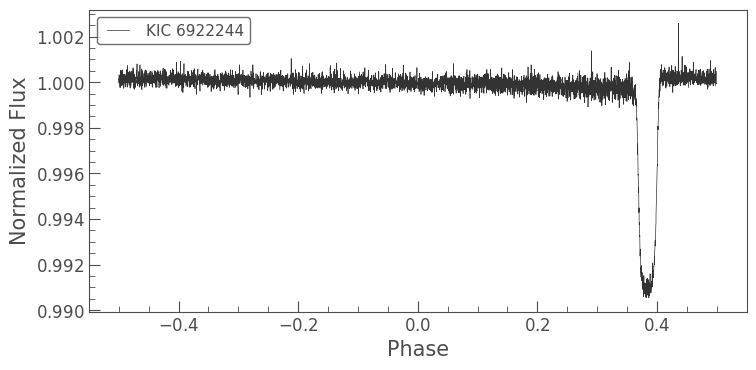

In [18]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

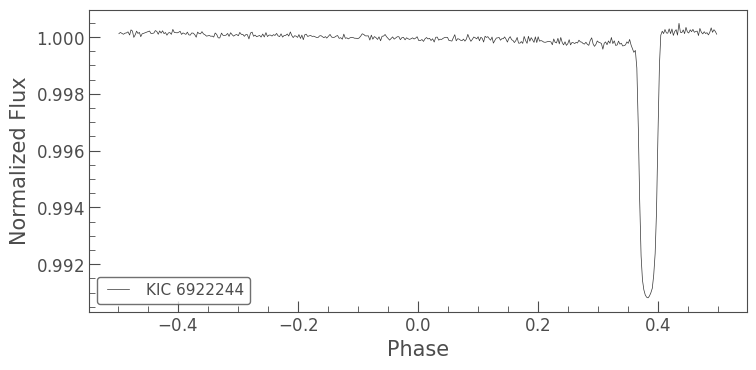

In [19]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();

** Or we can simply do all those operations at once using:**

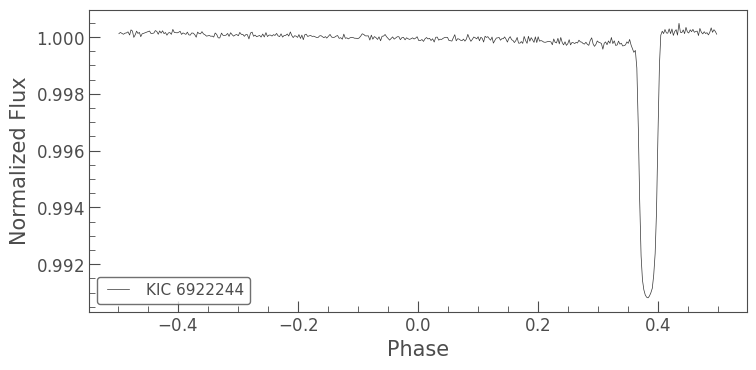

In [20]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();

# What are LightCurveFile objects?

Instead of using Target Pixel File to render a light curve, we can directly use a Light Curve File, which contains both, the non-corrected lightcurve (SAP_FLUX), and the corrected one (PDCSAP_FLUX):

C:\Users\pierr\Anaconda3\lib\site-packages\astropy\table\column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


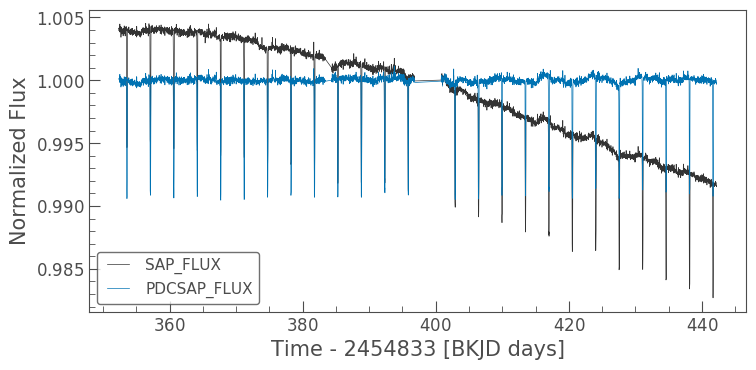

In [21]:
lcf = search_lightcurvefile(6922244, quarter=4).download()
lcf.plot()

We can choose one of the two LightCurve from the LightCurveFile:

In [22]:
pdcsap = lcf.PDCSAP_FLUX
pdcsap

KeplerLightCurve(ID: 6922244)

In [23]:
lcf

KeplerLightCurveFile(ID: 6922244)

The LightCurve contains the same info as the LightCurveFile:

In [24]:
pdcsap.mission, pdcsap.quarter, pdcsap.estimate_cdpp()

('Kepler', 4, 58.91594464224422)

# What is the Periodogram class?

Below is a quick example of how to find the period of an eclipsing binary star using lightkurve (and the periodogram class).

Firstly lets grab a light curve file from mast. We’ll use KIC 10030943, which is an eclipsing binary observed by the original Kepler mission. We’re just going to use one quarter for this demo.

In [5]:
import astropy.units as u
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
lc = search_lightcurvefile('10264202', quarter=10).download().PDCSAP_FLUX.remove_nans() # We're directly removing the nans
tpf = search_targetpixelfile('10264202', quarter=10).download()
tpf.path

'C:\\Users\\pierr\\.lightkurve-cache/mastDownload/Kepler/kplr010264202_lc_Q011111111111111111/kplr010264202-2011271113734_lpd-targ.fits.gz'

Here, we use the scatter method to show the dots (it would be messy with plot):

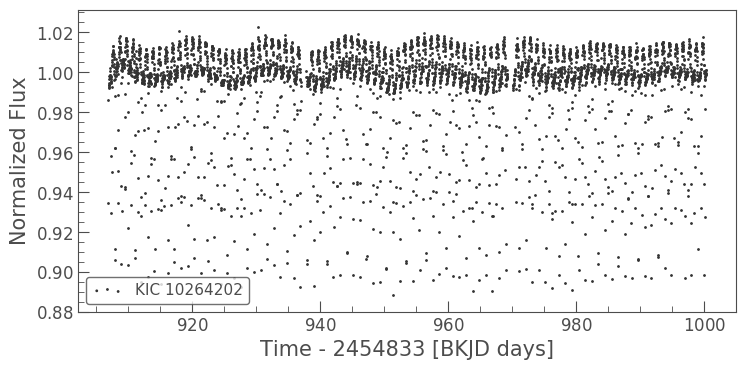

In [26]:
lc.scatter();

We can clearly a periodicity in the flux, that is what the periodogram class can help us define:

In [27]:
pg = lc.to_periodogram()

By showing the intensity of the signal for different frequencies:

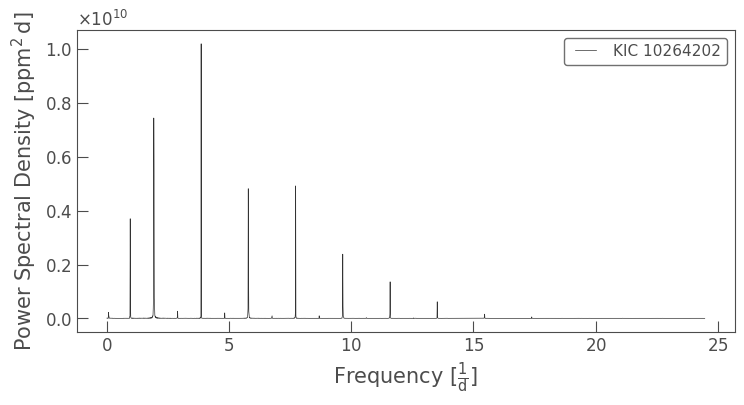

In [28]:
pg.plot()

We can see an important signal for a certain frequency! We can know plot it in the period space instead:

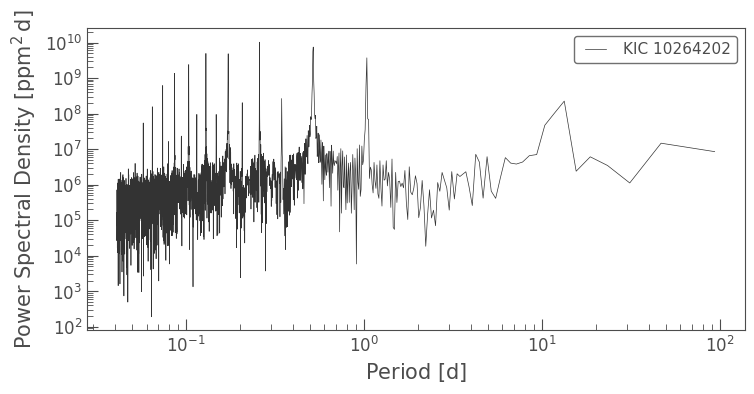

In [29]:
pg.plot(view='period', scale='log') #Use view instead of format

This looks like a very fast period. Let’s find the period with the highest power and fold out light curve.

Period with the highest power: 0.2587311606278735 d


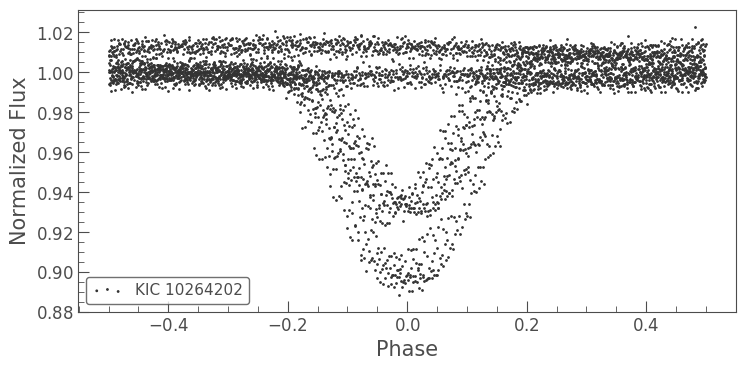

In [30]:
period = pg.period_at_max_power
print('Period with the highest power: {}'.format(period))
lc.fold(period.value).scatter(); #Folds the lightcurve around a certain period

We clearly see a harmonic oscillation, so we can fold by the same period multiplied by 4:

Period with the highest power: 1.034924642511494 d


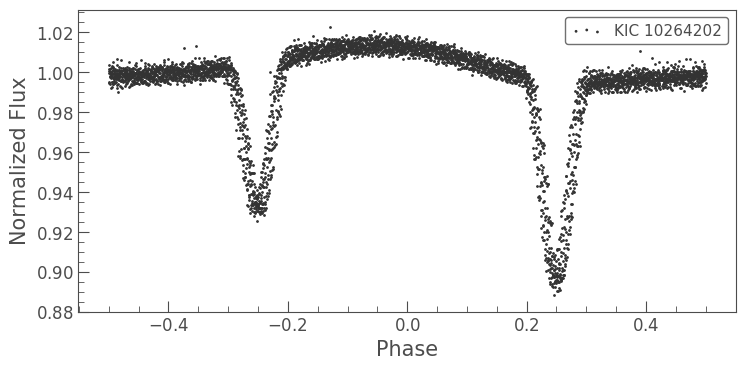

In [31]:
period = pg.period_at_max_power * 4
print('Period with the highest power: {}'.format(period))
lc.fold(period.value).scatter(); #Folds the lightcurve around a certain period

We could probably get a better fit than this. Let’s try increasing the number of points in our periodogram:

Period with the highest power: 1.0350971683913832 d


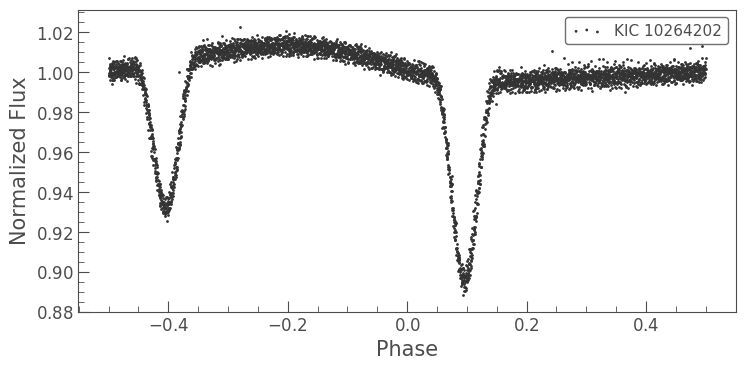

In [32]:
# I've set min_period and max_period to slightly reduce the computational time
pg = lc.to_periodogram(min_period=0.9*u.day, max_period=1.2*u.day, oversample_factor=10)
period = pg.period_at_max_power
print('Period with the highest power: {}'.format(period))
lc.fold(period.value).scatter();

That’s improved our fit! It looks like this eclipsing binary has a period of approximately 1 day.

<img src="src/kplr010264202-2011271113734_lpd-targ.fits.gz.gif" alt="KIC 10030943" title="KIC 10030943" />